In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/nlp_projects/data/AirlineTweets.csv", encoding="ISO-8859-1")

# Keep only the important columns (sentiment and text)
df = df[['airline_sentiment', 'text']]
# Rename the columns
df = df.rename(columns={"airline_sentiment": "Y", "text": "X"})

<Axes: >

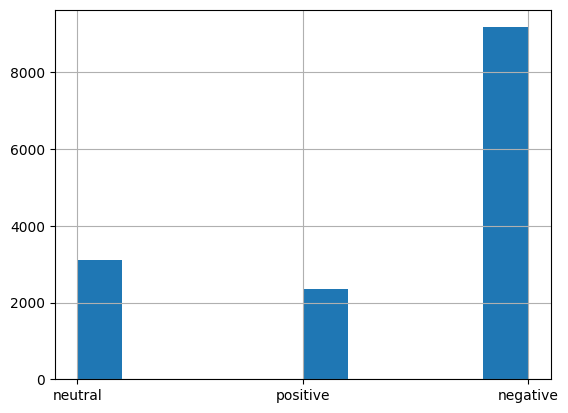

In [5]:
# Histogram to see how imbalanced the dataset is
df['Y'].hist()

In [6]:
# Create binary labels
df['labels'] = df['Y'].map({'negative':-1,'neutral': 0, 'positive': 1})
Y = df['labels'].to_numpy()

In [7]:
## SPLIT DATA TO TRAIN AND TEST

# Split the data into a training set and a test set
test_size = 0.2
random_state = 10
# split up the data
X_train, X_test, Y_train, Y_test = train_test_split(df['X'], Y, test_size=test_size, random_state=random_state)

In [8]:
## VECTORIZE (Text -> Numeric Sequences)

# Initialize the CountVectorizer with stop words removed
#vectorizer = TfidfVectorizer(stop_words='english',decode_error='ignore')
vectorizer = CountVectorizer(stop_words='english',decode_error='ignore')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
## CHOOSE CLASSIFIER/METHOD AND FIT MODEL
max_iter = 10000
model = LogisticRegression(max_iter=max_iter)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [10]:
## COMPUTE SEVERAL PERFORMANCE METRICS

# Accuracy
print("train acc:", model.score(X_train, Y_train))
print("test acc:", model.score(X_test, Y_test))
# Precision, Recall, Macro F1-Score
Ptrain = model.predict(X_train)
Ptest = model.predict(X_test)
pr_rec_f1_train = precision_recall_fscore_support(Y_train,Ptrain,average='macro')
pr_rec_f1_test = precision_recall_fscore_support(Y_test,Ptest,average='macro')
print("train Precision:", pr_rec_f1_train[0],"\ntrain Recall:",pr_rec_f1_train[1],"\ntrain F1:",pr_rec_f1_train[2])
print("test Precision:", pr_rec_f1_test[0],"\ntest Recall:",pr_rec_f1_test[1],"\ntest F1:",pr_rec_f1_test[2])

train acc: 0.9420252732240437
test acc: 0.7745901639344263
train Precision: 0.9367336251946538 
train Recall: 0.9126445655567844 
train F1: 0.9239215802619132
test Precision: 0.7350185432713435 
test Recall: 0.7040525086745446 
test F1: 0.7169039030253611
